add to kaggle!


#### Research questions:
1. What are the most popular genres?
2. What are the highest rated books?


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## top_goodreads_df

In [ ]:
top_goodreads_df = pd.read_csv('/content/drive/MyDrive/data/goodreads.csv') #https://www.kaggle.com/datasets/cristaliss/ultimate-book-collection-top-100-books-up-to-2023
top_goodreads_df.head(2)

,Unnamed: 0,isbn,title,series_title,series_release_number,authors,publisher,language,description,num_pages,format,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,url
0,0,9780689830594,Summer Story,Brambly Hedge,2,Jill Barklem,Atheneum,English,It was such a hot summer. The sky was deep blu...,32,Hardcover,"['Picture Books', 'Childrens', 'Fiction', 'Ani...","January 1, 1980",4.45,1017.0,74.0,7.0,512.0,3.49,https://www.goodreads.com/book/show/421572.Sum...
1,1,9780375704970,The Lake of Darkness,NaN,NaN,Ruth Rendell,Vintage Crime/Black Lizard,English,Martin Urban is a quiet bachelor with a comfor...,210,Paperback,"['Mystery', 'Fiction', 'Crime', 'Thriller', 'B...","January 1, 1980",3.76,1388.0,114.0,77.0,623.0,4.99,https://www.goodreads.com/book/show/83394.The_...


### Data Cleaning:


In [ ]:
top_goodreads_df.shape

(4400, 20)

In [ ]:
top_goodreads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4400 non-null   int64  
 1   isbn                   3806 non-null   object 
 2   title                  4400 non-null   object 
 3   series_title           2268 non-null   object 
 4   series_release_number  2256 non-null   object 
 5   authors                4400 non-null   object 
 6   publisher              4284 non-null   object 
 7   language               4374 non-null   object 
 8   description            4398 non-null   object 
 9   num_pages              4379 non-null   object 
 10  format                 4365 non-null   object 
 11  genres                 4400 non-null   object 
 12  publication_date       4399 non-null   object 
 13  rating_score           4400 non-null   float64
 14  num_ratings            4400 non-null   float64
 15  num_

In [ ]:
# top_goodreads_df.num_pages.unique()

- drop columns;
  - Unamed: 0
  - isbn
  - series_title?
  - description
  - url
  - format
- rename columns;
  - series_release_number = series number - if NaN == 0 (not a series)
- change data type; to int
  - num_pages
  - current_readers
  - want_to_read --> drop?
  - num_ratings
  - num_reviews
- publication_date change to date time?
- NaNs;
  - series_release_number .fillna(0)
  - publisher = unknown?
  - num_pages --> add pages numbers from google? (4400-4379) ?

In [ ]:
#drop columns
cols_to_drop2 = ['Unnamed: 0', 'isbn', 'series_title', 'description','format', 'url']

goodreads_clean_df = top_goodreads_df.copy()
goodreads_clean_df = goodreads_clean_df.drop(cols_to_drop2, axis=1)

#rename column
goodreads_clean_df = goodreads_clean_df.rename(columns={'series_release_number':'series_number'}).fillna(0)

#convert to int
num_cols = ['current_readers', 'want_to_read', 'num_ratings', 'num_reviews']
goodreads_clean_df[num_cols] = goodreads_clean_df[num_cols].astype(int)

In [ ]:
# goodreads_clean_df['num_pages'].unique()

**error that showed some values in 'num_pages' contained the word pages**

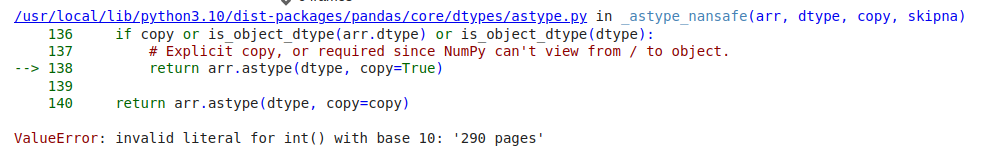

In [ ]:
#convert num_pages to int
def convert_to_int(x):
  try:
    return int(x.replace(' pages',''))
  except:
    return int(x)

goodreads_clean_df['num_pages'] = goodreads_clean_df['num_pages'].apply(convert_to_int)

In [ ]:
goodreads_clean_df.head(2)

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price
0,Summer Story,2,Jill Barklem,Atheneum,English,32,"['Picture Books', 'Childrens', 'Fiction', 'Ani...","January 1, 1980",4.45,1017,74,7,512,3.49
1,The Lake of Darkness,0,Ruth Rendell,Vintage Crime/Black Lizard,English,210,"['Mystery', 'Fiction', 'Crime', 'Thriller', 'B...","January 1, 1980",3.76,1388,114,77,623,4.99


In [ ]:
goodreads_clean_df['genres'].unique()

array(["['Picture Books', 'Childrens', 'Fiction', 'Animals', 'Fantasy', 'Classics', 'Short Stories']",
       "['Mystery', 'Fiction', 'Crime', 'Thriller', 'British Literature', 'Suspense', 'Mystery Thriller']",
       "['Science Fiction', 'Fiction', 'Space Opera', 'Science Fiction Fantasy', 'Fantasy', 'Aliens', 'Adventure']",
       ...,
       "['Science Fiction', 'Fiction', 'Audiobook', 'Adult', 'Science Fiction Fantasy', 'Space', 'Space Opera']",
       "['Fantasy', 'Romance', 'Adult', 'Young Adult', 'Fiction', 'High Fantasy', 'Magic']",
       "['Nonfiction', 'Politics', 'Sociology', 'History', 'Economics', 'Audiobook', 'Social Justice']"],
      dtype=object)

In [ ]:
goodreads_clean_df[goodreads_clean_df['title']== 'Sebring']

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price
122,Sebring,5,Kristen Ashley,Robinson,English,312,"['Mystery', 'Historical Fiction', 'Fiction', '...","January 1, 1981",4.0,23821,1675,873,5172,9.99
3695,Sebring,5,Kristen Ashley,Amazon Digital Services,English,367,"[Romance,Contemporary Romance,Contemporary,Ero...","January 11, 2016",4.3,14822,1352,0,0,4.99


In [ ]:
# Drop duplicate rows based on title column keeping the first occurrence
unique_goodreads = goodreads_clean_df.drop_duplicates(subset=['title'])

unique_goodreads.title.value_counts()
unique_goodreads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 0 to 4399
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4128 non-null   object 
 1   series_number     4128 non-null   object 
 2   authors           4128 non-null   object 
 3   publisher         4128 non-null   object 
 4   language          4128 non-null   object 
 5   num_pages         4128 non-null   int64  
 6   genres            4128 non-null   object 
 7   publication_date  4128 non-null   object 
 8   rating_score      4128 non-null   float64
 9   num_ratings       4128 non-null   int64  
 10  num_reviews       4128 non-null   int64  
 11  current_readers   4128 non-null   int64  
 12  want_to_read      4128 non-null   int64  
 13  price             4128 non-null   float64
dtypes: float64(2), int64(5), object(7)
memory usage: 483.8+ KB


#### Genres

In [ ]:
unique_goodreads.sample(2)

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price
1013,Maniac Magee,0,Jerry Spinelli,Scholastic,English,184,"['Young Adult', 'Fiction', 'Childrens', 'Middl...","April 2, 1990",3.89,124629,4912,1903,20900,7.99
1286,A Bone to Pick,2,Charlaine Harris,Walker & Co,English,168,"['Mystery', 'Fiction', 'Cozy Mystery', 'Crime'...","November 1, 1992",3.75,24000,1285,915,7493,4.99


In [ ]:
type(unique_goodreads['genres'].unique())

numpy.ndarray

- str.extract() is used to extract capture groups in the regex pattern.
- r'(Fiction|Nonfiction)' is the regular expression that matches either 'Fiction' or 'Nonfiction'.
- expand=False makes sure the result is a Series rather than a DataFrame with a single column

In [ ]:
genre_type = unique_goodreads.copy()
genre_type['gen_type'] = genre_type['genres'].str.extract(r'(Fiction|Nonfiction)')#, expand=True)
genre_type.head(2)
#genre_type[genre_type.gen_type.isna()]

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type
0,Summer Story,2,Jill Barklem,Atheneum,English,32,"['Picture Books', 'Childrens', 'Fiction', 'Ani...","January 1, 1980",4.45,1017,74,7,512,3.49,Fiction
1,The Lake of Darkness,0,Ruth Rendell,Vintage Crime/Black Lizard,English,210,"['Mystery', 'Fiction', 'Crime', 'Thriller', 'B...","January 1, 1980",3.76,1388,114,77,623,4.99,Fiction


#### Playing with genres
- .explode
- .tolist

In [ ]:
# df_exploded = genre_type.explode('genres')
# df_exploded.head()
genre_type['genres'].apply(type).unique() #check data types - genres are string that look like lists

array([<class 'str'>], dtype=object)

In [ ]:
# import ast
# genre_type['genres'] = genre_type['genres'].apply(ast.literal_eval) #If the 'genres' column contains strings, convert them to lists using ast

# # explode the genre lists ie create a new row for each genre (produces duplicate titles)
# df_exploded = genre_type.explode('genres')
# df_exploded
# df_exploded['genres'].value_counts().head(15)


In [ ]:
# #seperate genres into columns
# genres_df = pd.DataFrame(genre_type['genres'].tolist(), index=genre_type['title'])
# genres_df.value_counts().head(20)

In [ ]:
# print(genres_df[0].value_counts().head(5))
# print(genres_df[1].value_counts().head(5))
# print(genres_df[2].value_counts().head(5))
# print(genres_df[3].value_counts().head(5))
# print(genres_df[4].value_counts().head(5))
# print(genres_df[5].value_counts().head(5))
# print(genres_df[6].value_counts().head(5))

In [ ]:
# #to combine all the genres into 1 list
# import itertools

# # Flatten the list of genres
# all_genres = list(itertools.chain.from_iterable(genre_type['genres']))

# # Get unique genres
# unique_genres = list(set(all_genres))
# # unique_genres

### Choosing which genres to include

In [ ]:
genre_type['genres'].value_counts().head(20)

genres
['Fantasy', 'Fiction', 'Young Adult', 'Childrens', 'Animals', 'Adventure', 'Middle Grade']                       12
['Fiction', 'Young Adult', 'Childrens', 'Middle Grade', 'Fantasy', 'Mystery', 'Adventure']                       11
['Mystery', 'Crime', 'Fiction', 'Thriller', 'Mystery Thriller', 'Suspense', 'Murder Mystery']                    10
['Mystery', 'Fiction', 'Crime', 'Thriller', 'Detective', 'Mystery Thriller', 'Suspense']                         10
['Mystery', 'Fiction', 'Crime', 'Thriller', 'Detective', 'Mystery Thriller', 'Audiobook']                         9
[]                                                                                                                9
['Fantasy', 'Urban Fantasy', 'Fiction', 'Mystery', 'Paranormal', 'Magic', 'Audiobook']                            8
['Fantasy', 'Vampires', 'Paranormal', 'Urban Fantasy', 'Romance', 'Fiction', 'Mystery']                           8
['Fiction', 'Thriller', 'Mystery', 'Legal Thriller', 'Crime', 'Su

In [ ]:
top_genres_df = genre_type.copy()
top_genres_df['genre'] = top_genres_df['genres'].str.extract(r'(Fantasy|Mystery|Thriller|Graphic Novels|Comics|Romance|Historical Fiction|\
              Historical|History|Crime|Science Fiction|Science|Biography|Classics|Self Help|Feminism|\
              Horror|Comedy|Humor|Politics|Poetry|Contemporary|Picture Books|Religion)', expand=False)

top_genres_df.sample(5)

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
2682,Echo Park,"12,17",Michael Connelly,"Little, Brown & Company",English,405,"['Mystery', 'Fiction', 'Crime', 'Thriller', 'D...","October 9, 2006",4.17,60951,2479,3421,10900,9.99,Fiction,Mystery
785,The Content of the Form: Narrative Discourse a...,0,Hayden White,Johns Hopkins University Press,English,264,"['History', 'Philosophy', 'Theory', 'Nonfictio...","January 1, 1987",4.02,204,13,27,635,25.65,Nonfiction,History
1858,The Pianist: The Extraordinary Story of One Ma...,0,Władysław Szpilman,Victor Gollancz,English,222,"['Nonfiction', 'History', 'Biography', 'Holoca...","January 1, 1946",4.24,77423,1692,967,81000,11.99,Nonfiction,History
2184,Good in Bed,1,Jennifer Weiner,Washington Square Press,English,376,"['Chick Lit', 'Fiction', 'Romance', 'Contempor...","April 2, 2002",3.75,304544,6533,2568,161000,13.99,Fiction,Romance
4353,Big Swiss,0,Jen Beagin,Scribner,English,336,"['Fiction', 'Contemporary', 'LGBT', 'Romance',...","February 7, 2023",3.70,49941,8331,5511,135000,12.99,Fiction,Contemporary


In [ ]:
# top_genres_df['genre'].value_counts()

In [ ]:
#Historical Fiction|Historical|History

# Replace 'Historical Fiction' with 'Historical' - historical falls under fiction and non fiction
top_genres_df['genre'] = top_genres_df['genre'].replace('Historical Fiction', 'Historical')
# Replace 'History' with 'Historical' to group them as similar
top_genres_df['genre'] = top_genres_df['genre'].replace('History', 'Historical')
top_genres_df['genre'] = top_genres_df['genre'].replace('Humor', 'Comedy')
top_genres_df['genre'] = top_genres_df['genre'].replace('Comics', 'Graphic Novels')

top_genres_df[top_genres_df['genre'].isna()].head()

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
85,Nation,0,Terry Pratchett,Harvest,English,528,"['Cookbooks', 'Cooking', 'Food', 'Nonfiction',...","January 1, 1980",4.21,17219,165,722,44500,25.99,Nonfiction,NaN
164,Agua Quemada,0,Carlos Fuentes,Punto De Lectura,Spanish; Castilian,159,"['Short Stories', 'Fiction', 'Literature', 'No...","May 15, 1981",3.68,664,68,29,394,8.99,Fiction,NaN
180,Rhinestone Sharecropping,0,Bill Gunn,I Reed Books,English,193,[],"December 1, 1981",3.83,18,2,0,124,0.00,NaN,NaN
181,"On history, heritage and religion",0,Saddam Hussein,Translation & Foreign Languages Publishing,English,45,[],"January 1, 1981",4.25,4,0,0,42,0.00,NaN,NaN
292,The Read-Aloud Handbook,0,Jim Trelease,Penguin Books,English,340,"['Parenting', 'Nonfiction', 'Education', 'Book...","September 30, 1982",4.40,7247,1142,754,6490,8.99,Nonfiction,NaN


In [ ]:
#Science|Science Fiction

# # Find rows where 'genre' is 'Science'
# science = top_genres_df[top_genres_df['genre']=='Science']
# # Filter by 'Fiction'
# scifi = science[science['gen_type']=='Fiction']
# # Replace 'Science' with 'SciFi' in the 'genre' column of the original DataFrame
# top_genres_df.loc[scifi.index, 'genre'] = 'SciFi'

In [ ]:
# top_genres_df[top_genres_df.genre == 'Science']

In [ ]:
#genre checks
x = top_genres_df[top_genres_df['genre'].isna()] # checking on NaNs in new genre column to detemine if I should add any other genres to top_genres_df['genres'].str.extract
x.genres.value_counts().head(10)

comedy = top_genres_df[top_genres_df['genre'] == 'Comedy']
comedy.genres.value_counts().head()

top_genres_df[top_genres_df['genre'] == 'Religion']

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
79,The God Delusion,0,Richard Dawkins,Houghton Mifflin Co.,English,374,"['Nonfiction', 'Religion', 'Science', 'Philoso...","October 1, 2006",3.90,266885,9499,16600,279000,13.99,Nonfiction,Religion
229,The Tao of Pooh,0,Benjamin Hoff,Penguin Books,English,158,"['Philosophy', 'Nonfiction', 'Spirituality', '...","April 28, 1982",4.00,119828,5929,3116,4158,6.99,Nonfiction,Religion
675,The Counterlife,0,Philip Roth,Vintage,English,324,"['Fiction', 'Novels', 'American', 'Literature'...","January 1, 1986",3.91,5116,402,245,4327,12.99,Fiction,Religion
865,The Case for Christ,0,Lee Strobel,Zondervan,English,367,"['Christian', 'Nonfiction', 'Religion', 'Chris...","January 1, 1998",4.20,131240,2825,7150,111000,11.49,Nonfiction,Religion
1031,The Gift of Asher Lev,0,Chaim Potok,Fawcett Books,English,384,"['Fiction', 'Jewish', 'Judaism', 'Religion', '...","January 1, 1990",4.18,8092,516,248,3719,13.99,Fiction,Religion
1397,The Ragamuffin Gospel,0,Brennan Manning,Multnomah Books,English,240,"['Christian', 'Nonfiction', 'Faith', 'Christia...","December 1, 1990",4.19,38077,1673,2152,30100,13.99,Nonfiction,Religion
1493,The Sign of the Cross: Travels in Catholic Europe,0,Colm Tóibín,Vintage,English,304,"['Travel', 'Nonfiction', 'Religion', 'Ireland'...","January 1, 1994",3.79,208,35,11,415,0.00,Nonfiction,Religion
1525,Left Behind,1,Tim LaHaye,Tyndale House Publishers,English,470,"['Fiction', 'Christian', 'Christian Fiction', ...","September 29, 1995",3.85,231987,4412,2756,69700,11.99,Fiction,Religion
1538,The Rapture of Canaan,0,Sheri Reynolds,0,English,320,"['Fiction', 'Religion', 'Historical Fiction', ...","January 1, 1995",3.83,34454,908,131,12300,14.99,Fiction,Religion
1572,Tribulation Force,2,Tim LaHaye,Tyndale House Publishers,English,452,"['Fiction', 'Christian Fiction', 'Christian', ...","September 27, 1996",3.97,42524,1207,804,8045,11.84,Fiction,Religion


In [ ]:
#genre NaNs = 'Other'

top_genres_df['genre'] = top_genres_df['genre'].fillna('Other')
top_genres_df[top_genres_df['genre'] == 'Other'] # df filtered by 'Other' genre

# top_genres_df.info() #showed there are some nans in gen_type
# top_genres_df.sample(2)

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
85,Nation,0,Terry Pratchett,Harvest,English,528,"['Cookbooks', 'Cooking', 'Food', 'Nonfiction', 'Reference', 'Foodie', 'Culinary']","January 1, 1980",4.21,17219,165,722,44500,25.99,Nonfiction,Other
164,Agua Quemada,0,Carlos Fuentes,Punto De Lectura,Spanish; Castilian,159,"['Short Stories', 'Fiction', 'Literature', 'Novels', 'Spanish Literature', 'Latin American', 'Literary Fiction']","May 15, 1981",3.68,664,68,29,394,8.99,Fiction,Other
180,Rhinestone Sharecropping,0,Bill Gunn,I Reed Books,English,193,[],"December 1, 1981",3.83,18,2,0,124,0.00,NaN,Other
181,"On history, heritage and religion",0,Saddam Hussein,Translation & Foreign Languages Publishing,English,45,[],"January 1, 1981",4.25,4,0,0,42,0.00,NaN,Other
292,The Read-Aloud Handbook,0,Jim Trelease,Penguin Books,English,340,"['Parenting', 'Nonfiction', 'Education', 'Books About Books', 'Reference', 'Teaching', 'Adult']","September 30, 1982",4.40,7247,1142,754,6490,8.99,Nonfiction,Other
328,Life & Times of Michael K,0,J.M. Coetzee,Vintage,English,192,"['Fiction', 'South Africa', 'Literature', 'Novels', 'Nobel Prize', 'Literary Fiction', 'African Literature']","January 1, 1983",3.86,19046,1278,437,15100,4.99,Fiction,Other
354,Postscript to the Name of the Rose,0,Umberto Eco,Houghton Mifflin Harcourt,English,84,"['Nonfiction', 'Literature', 'Essays', 'Books About Books', 'Italian Literature', 'Writing', 'Italy']","April 1, 1983",4.05,1649,143,40,1787,0.00,Nonfiction,Other
366,Someday Angeline,1,Louis Sachar,HarperCollins,English,154,"['Childrens', 'Fiction', 'Middle Grade', 'Young Adult', 'Realistic Fiction', 'Juvenile', 'Family']","May 1, 1983",4.14,1852,185,62,823,1.99,Fiction,Other
391,For Reading Out Loud,0,Margaret Mary Kimmel,Delacorte Books for Young Readers,English,266,['Nonfiction'],"January 1, 1983",4.00,16,0,0,29,0.00,Nonfiction,Other
392,Fair Friday,3,Peter Turnbull,Fontana,English,189,['Fiction'],"January 1, 1983",3.41,17,0,0,21,0.00,Fiction,Other


In [ ]:
nan_gen_type = top_genres_df.copy()
nan_gen_type[nan_gen_type.gen_type.isna()] #check for nans in gen_type
nan_gen_type['genre'].unique() #check unique genre values

other_gen = nan_gen_type[nan_gen_type['genre']== 'Other'] #find 'Other' genre - checking for gen_type nans that can be explained
# other_gen[other_gen['gen_type'].isna()]

# if title = On history, heritage and religion, make gen_type non fiction
nan_gen_type.loc[nan_gen_type['title'] == 'On history, heritage and religion', 'gen_type'] = 'Nonfiction'
nan_gen_type.loc[nan_gen_type['title'] == 'Los caprichos de Francisco de Goya y Lucientes', 'gen_type'] = 'Nonfiction'
nan_gen_type.loc[nan_gen_type['title'] == 'Paths of Resistance', 'gen_type'] = 'Nonfiction'
# nan_gen_type.info()
# other_gen[other_gen['gen_type'].isna()]


In [ ]:
nan_gen_type[nan_gen_type.gen_type.isna()] #check for nans
nan_gen_type.genre.unique() #genres look like fiction except for poetry
nan_gen_type[nan_gen_type['genre'] == 'Poetry']
nan_gen_type.loc[nan_gen_type['genre'] == 'Poetry', 'gen_type'] = 'Nonfiction'

nan_gen_type[nan_gen_type.gen_type.isna()]
# nan_gen_type.genre.unique()

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
47,The Lunatic Cafe,4,Laurell K. Hamilton,Berkley,English,352,"['Urban Fantasy', 'Vampires', 'Fantasy', 'Para...","January 1, 1996",4.13,78631,1559,792,10800,8.99,NaN,Fantasy
91,Ecstasy Unveiled,4,Larissa Ione,Hachette Book Group,English,414,"['Paranormal Romance', 'Paranormal', 'Romance'...","January 1, 2010",4.32,28953,996,294,3430,7.99,NaN,Romance
93,The Iron Queen,3,Julie Kagawa,Harlequin Teen,English,384,"['Fantasy', 'Young Adult', 'Romance', 'Fae', '...","January 25, 2011",4.20,106257,5193,1233,60400,9.99,NaN,Fantasy
96,Hard Bitten,4,Chloe Neill,NAL Trade,English,350,"['Urban Fantasy', 'Vampires', 'Paranormal', 'F...","April 12, 2011",4.14,38780,2505,562,10600,11.99,NaN,Fantasy
97,Magic Slays,5,Ilona Andrews,Ace,English,308,"['Urban Fantasy', 'Fantasy', 'Paranormal', 'Ro...","May 31, 2011",4.40,74605,3381,1808,12100,8.99,NaN,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,Lore Olympus: Volume Four,4,Rachel Smythe,Random House Worlds,English,416,"['Graphic Novels', 'Fantasy', 'Romance', 'Myth...","June 6, 2023",4.51,25765,1881,365,16500,0.00,NaN,Graphic Novels
4381,Devious Obsession,0,S. Massery,0,English,512,"['Sports Romance', 'Sports', 'Hockey', 'Romanc...","March 23, 2023",4.05,11469,1150,1878,16000,0.00,NaN,Romance
4385,Bone Island: Book of Danvers,2,Nicole Fiorina,Nicole Fiorina Books,English,680,"['Fantasy', 'Romance', 'Paranormal', 'Gothic',...","March 17, 2023",4.45,1295,415,283,7175,6.99,NaN,Fantasy
4390,God of Ruin,4,Rina Kent,"Blackthorn Books, LLC",English,430,"['Romance', 'Dark', 'College', 'New Adult', 'C...","August 31, 2023",4.12,30545,3724,3068,33800,0.00,NaN,Romance


In [ ]:
gen_type = nan_gen_type.copy()
gen_type['gen_type'] = gen_type['gen_type'].fillna('Fiction')
gen_type.head()

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
0,Summer Story,2,Jill Barklem,Atheneum,English,32,"['Picture Books', 'Childrens', 'Fiction', 'Ani...","January 1, 1980",4.45,1017,74,7,512,3.49,Fiction,Picture Books
1,The Lake of Darkness,0,Ruth Rendell,Vintage Crime/Black Lizard,English,210,"['Mystery', 'Fiction', 'Crime', 'Thriller', 'B...","January 1, 1980",3.76,1388,114,77,623,4.99,Fiction,Mystery
2,Beyond the Blue Event Horizon,2,Frederik Pohl,Ballantine Books,English,336,"['Science Fiction', 'Fiction', 'Space Opera', ...","January 1, 1980",3.95,13307,339,181,3961,11.99,Fiction,Science Fiction
3,St. Peter's Fair,4,Ellis Peters,Mysterious Press,English,217,"['Mystery', 'Historical Fiction', 'Fiction', '...","May 1, 1981",4.12,10493,593,1298,2502,0.00,Fiction,Mystery
4,Twice Shy,0,Dick Francis,G.P. Putnam's Sons,English,304,"['Mystery', 'Fiction', 'Thriller', 'Crime', 'S...","January 1, 1981",3.92,4188,174,162,642,8.99,Fiction,Mystery


In [ ]:
gen_type.genre.unique()
gen_type.gen_type.unique()
gen_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 0 to 4399
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4128 non-null   object 
 1   series_number     4128 non-null   object 
 2   authors           4128 non-null   object 
 3   publisher         4128 non-null   object 
 4   language          4128 non-null   object 
 5   num_pages         4128 non-null   int64  
 6   genres            4128 non-null   object 
 7   publication_date  4128 non-null   object 
 8   rating_score      4128 non-null   float64
 9   num_ratings       4128 non-null   int64  
 10  num_reviews       4128 non-null   int64  
 11  current_readers   4128 non-null   int64  
 12  want_to_read      4128 non-null   int64  
 13  price             4128 non-null   float64
 14  gen_type          4128 non-null   object 
 15  genre             4076 non-null   object 
dtypes: float64(2), int64(5), object(9)
memory usage

#### datetime

In [ ]:
# gen_type.info()

**ValueError**: time data "Published October 1, 1996" doesn't match format "%B %d, %Y"

In [ ]:
goodreads_df = gen_type.copy()

goodreads_df[goodreads_df['publication_date']=='Published October 1, 1996']
goodreads_df['publication_date'] = goodreads_df['publication_date'].str.replace('Published ', '')
# goodreads_df.info()
goodreads_df['publication_date'] = pd.to_datetime(goodreads_df['publication_date']) #convert to datetime
# goodreads_df[goodreads_df['publication_date'].isna()]
goodreads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 0 to 4399
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             4128 non-null   object        
 1   series_number     4128 non-null   object        
 2   authors           4128 non-null   object        
 3   publisher         4128 non-null   object        
 4   language          4128 non-null   object        
 5   num_pages         4128 non-null   int64         
 6   genres            4128 non-null   object        
 7   publication_date  4127 non-null   datetime64[ns]
 8   rating_score      4128 non-null   float64       
 9   num_ratings       4128 non-null   int64         
 10  num_reviews       4128 non-null   int64         
 11  current_readers   4128 non-null   int64         
 12  want_to_read      4128 non-null   int64         
 13  price             4128 non-null   float64       
 14  gen_type          4128 non-nu

In [ ]:
goodreads_df.head(2)

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
0,Summer Story,2,Jill Barklem,Atheneum,English,32,"['Picture Books', 'Childrens', 'Fiction', 'Ani...",1980-01-01,4.45,1017,74,7,512,3.49,Fiction,Picture Books
1,The Lake of Darkness,0,Ruth Rendell,Vintage Crime/Black Lizard,English,210,"['Mystery', 'Fiction', 'Crime', 'Thriller', 'B...",1980-01-01,3.76,1388,114,77,623,4.99,Fiction,Mystery


### What are the most popular genres?

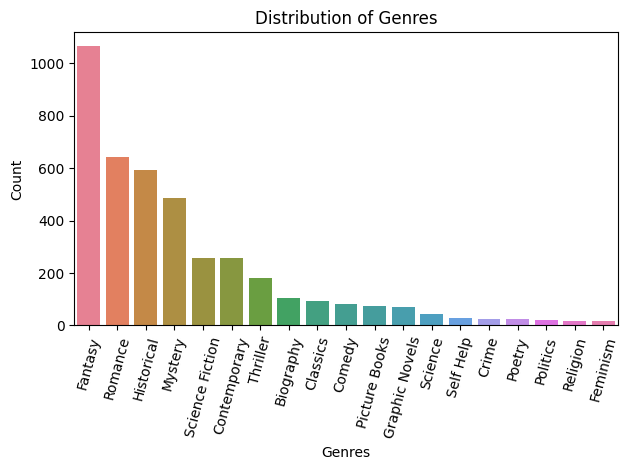

In [ ]:
gen_count = goodreads_df.genre.value_counts()
gen_count
sns.barplot(x=gen_count.index, hue=gen_count.index, y=gen_count.values, palette='husl')
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
uni_gen_count = goodreads_df.genre.value_counts()
uni_gen_count #count for all unique genres

genre
Fantasy            1065
Romance             641
Historical          593
Mystery             486
Science Fiction     257
Contemporary        256
Thriller            181
Biography           105
Classics             95
Comedy               81
Picture Books        74
Graphic Novels       70
Science              43
Self Help            27
Crime                26
Poetry               24
Politics             20
Religion             16
Feminism             16
Name: count, dtype: int64

In [ ]:
##looking at the genre 'Other'
# other_gen = goodreads_df[goodreads_df['genre']=='Other']
# other_gen['genres'].value_counts()

#### Non-fiction

In [ ]:
# non fiction genres
nf_gen_msk = goodreads_df[goodreads_df['gen_type'] == 'Nonfiction'] #filter mask for non fic
nf_gen_msk #filter dataframe
nf_gen_count = nf_gen_msk['genre'].value_counts()#.head(10) #value count for nonfiction top 10
nf_gen_count

genre
Historical        132
Biography         105
Science            43
Comedy             42
Self Help          27
Poetry             24
Politics           17
Crime              11
Feminism           11
Religion           10
Graphic Novels      8
Picture Books       1
Classics            1
Name: count, dtype: int64

In [ ]:
# nf_gen_count

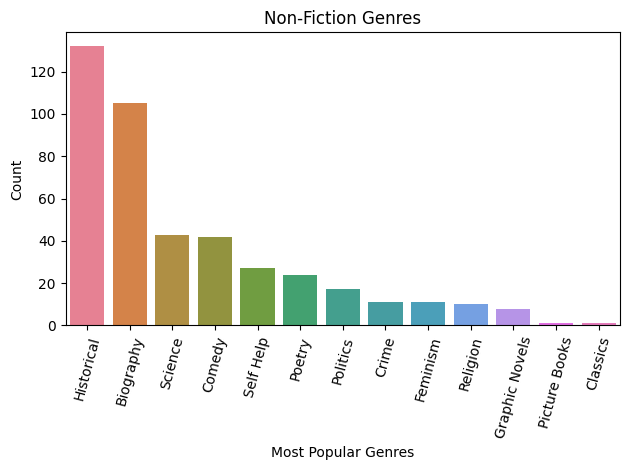

In [ ]:
#non fiction
sns.barplot(x=nf_gen_count.index, hue=nf_gen_count.index, y=nf_gen_count.values, palette='husl')
plt.title('Non-Fiction Genres')
plt.xlabel('Most Popular Genres')
plt.ylabel('Count')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
nf_type = nan_gen_type[nan_gen_type['gen_type'] == 'Nonfiction'] #filter by non fic - df
type_check = nf_type[nf_type['genre']=='Horror'] #filter non fic by specific genre
type_check['genres'].unique() #checking original genres to make sure it should be nonfic
# type(type_check)
# type_check = nan_gen_type[(nan_gen_type['gen_type'] == 'Nonfiction') & (nan_gen_type['genre'] == 'Crime')]

array([], dtype=object)

In [ ]:
nf_gen_msk.genre.value_counts().head(5)

genre
Historical    132
Biography     105
Science        43
Comedy         42
Self Help      27
Name: count, dtype: int64

In [ ]:
# type_check['genres'].unique()

#### Fiction

In [ ]:
#fiction genres
fic_gen_msk = goodreads_df[goodreads_df['gen_type'] == 'Fiction'] #filter mask for fiction


In [ ]:
fic_gen_count = fic_gen_msk.genre.value_counts()#.head(10) #value count for fiction top 10
# fic_gen_count

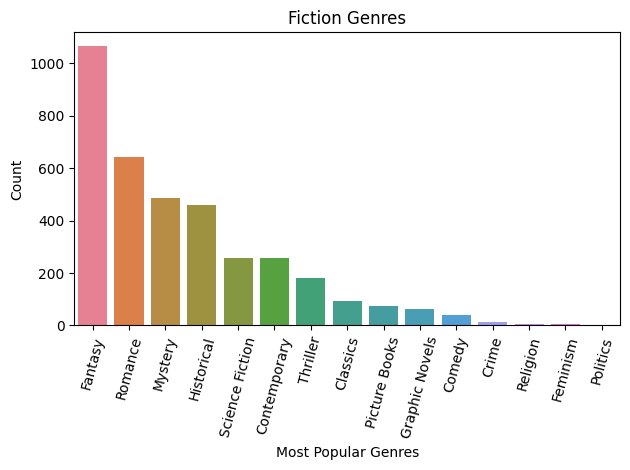

In [ ]:
#fiction genres
sns.barplot(x=fic_gen_count.index, hue=fic_gen_count.index, y=fic_gen_count.values, palette='husl')
plt.title('Fiction Genres')
plt.xlabel('Most Popular Genres')
plt.ylabel('Count')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



In [ ]:
fic_gen_msk.genre.value_counts().head(5)

genre
Fantasy            1065
Romance             641
Mystery             486
Historical          461
Science Fiction     257
Name: count, dtype: int64

In [ ]:
fic_type = nan_gen_type[nan_gen_type['gen_type'] == 'Fiction'] #filter by fic
type_check_f = fic_type[fic_type['genre']=='Horror'] #filter fic by specific genre
type_check_f['genres'].unique() #checking original genres to make sure it should be nfic

array([], dtype=object)

### What are the highest rated books?


In [ ]:
goodreads_df.sample(2)

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
3067,Archangel's Kiss,2,Nalini Singh,Berkley Sensation,English,323,"['Paranormal', 'Urban Fantasy', 'Romance', 'Pa...",2010-02-01,4.20,57775,2645,1433,14100,7.99,Fiction,Fantasy
885,Zoya,0,Danielle Steel,Debolsillo,Spanish; Castilian,384,"['Romance', 'Fiction', 'Historical Fiction', '...",1988-01-01,4.02,15094,555,461,6142,8.99,Fiction,Romance


### Highest rated books

- 'rating_score' - The average rating of the book on Goodreads, reflecting reader assessments
- 'num_ratings'  -  The count of ratings received by the book on Goodreads, indicating reader engagement.


In [ ]:
#sorting df by the ratings column in descending order
ordered_ratings_df = goodreads_df.copy().sort_values(by='rating_score', ascending=False)
ordered_ratings_df.head(2)

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
2542,The Complete Calvin and Hobbes,0,Bill Watterson,Andrews McMeel Publishing,English,1456,"['Comics', 'Humor', 'Graphic Novels', 'Fiction...",2005-09-06,4.81,40012,1182,998,16400,0.00,Fiction,Graphic Novels
3448,Words of Radiance,2,Brandon Sanderson,Tor Books,English,1087,"['Fantasy', 'Fiction', 'Epic Fantasy', 'High F...",2014-03-04,4.76,339256,20643,17000,104000,9.99,Fiction,Fantasy


In [ ]:
#5 highest rating scores across all books
ordered_ratings_df['rating_score'].head(1)

2542    4.81
Name: rating_score, dtype: float64

In [ ]:
#5 lowest rating score across all books
ordered_ratings_df['rating_score'].tail(1)

2671    2.97
Name: rating_score, dtype: float64

#### top non-fiction ratings


In [ ]:
#5 highest rating scores non-fiction
nf_ratings_msk = ordered_ratings_df[ordered_ratings_df['gen_type'] == 'Nonfiction'] #filter mask for non fic
nf_ratings_msk.head(2) #dataframe of nf books only

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
3985,Know My Name,0,Chanel Miller,Viking,English,384,"['Nonfiction', 'Memoir', 'Audiobook', 'Feminis...",2019-09-24,4.71,192990,26631,14800,311000,11.99,Nonfiction,Feminism
589,"The Price of the Ticket: Collected Nonfiction,...",0,James Baldwin,St. Martin's Press,English,712,"['Nonfiction', 'Essays', 'Race', 'History', 'A...",1985-09-15,4.67,606,60,148,6694,0.00,Nonfiction,Historical


In [ ]:
#adjusting display settings to avoid truncation (shortening of the titles)
pd.set_option('display.max_colwidth', None) #setting max column width to none (ie unlimited)
top_10_nf = nf_ratings_msk[['title', 'authors' ,'rating_score']].head(10)
top_10_nf

,title,authors,rating_score
3985,Know My Name,Chanel Miller,4.71
589,"The Price of the Ticket: Collected Nonfiction, 1948-1985",James Baldwin,4.67
3872,The Sun Does Shine: How I Found Life and Freedom on Death Row,Anthony Ray Hinton,4.64
196,Too Many Songs by Tom Lehrer with Not Enough Drawings by Ronald Searle,Tom Lehrer,4.61
198,"Women, Race & Class",Angela Y. Davis,4.58
21,The Complete Maus,Art Spiegelman,4.57
147,The Hill We Climb: An Inaugural Poem for the Country,Amanda Gorman,4.56
4129,Empire of Pain: The Secret History of the Sackler Dynasty,Patrick Radden Keefe,4.54
681,"The Civil War, Vol. 2: Fredericksburg to Meridian",Shelby Foote,4.53
4025,Caste: The Origins of Our Discontents,Isabel Wilkerson,4.53


In [ ]:
nf_rating_10 = nf_ratings_msk.head(10)
# nf_rating_10#.info()
# nf_rating_10['rating_score']

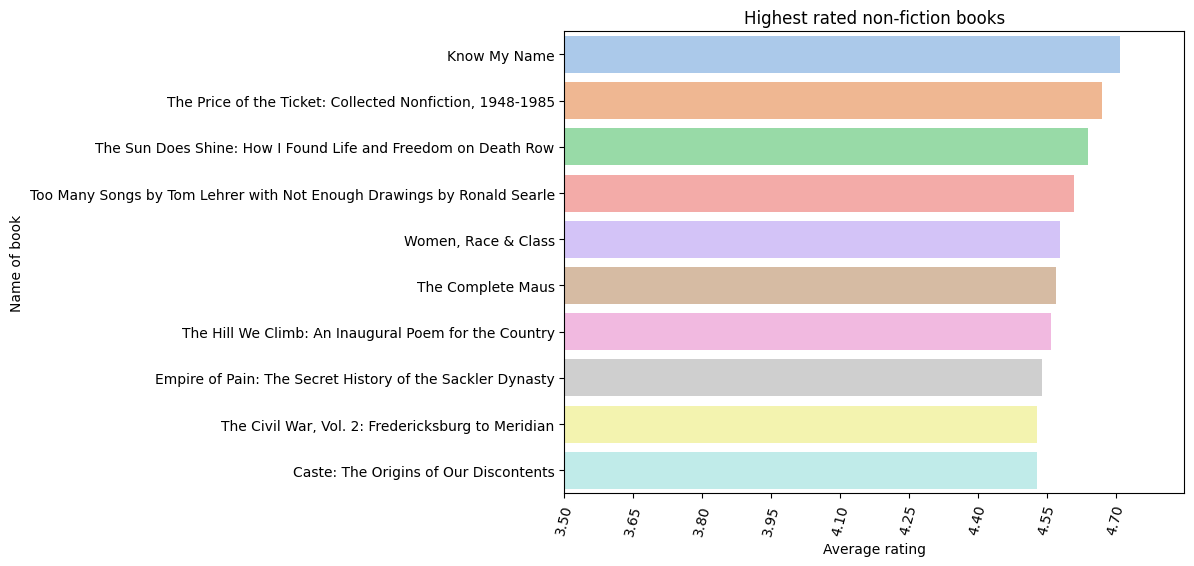

In [ ]:
#highest rated nf
plt.figure(figsize=(8,6))
sns.barplot(y='title', x='rating_score', hue='title', data=nf_rating_10, palette='pastel')
plt.title('Highest rated non-fiction books')
plt.ylabel('Name of book')
plt.xlabel('Average rating')
plt.xticks(rotation=75)
plt.xlim([3.5,4.85])
plt.xticks(np.arange(3.5, 4.85, step=0.15))  # Set label locations (start at, end at, step by)
plt.show()

#### top fiction ratings


In [ ]:
#fiction
fic_ratings_msk = ordered_ratings_df[ordered_ratings_df['gen_type'] == 'Fiction'] #filter mask for fic
fic_ratings_msk.head(2) #dataframe of fic books only

,title,series_number,authors,publisher,language,num_pages,genres,publication_date,rating_score,num_ratings,num_reviews,current_readers,want_to_read,price,gen_type,genre
2542,The Complete Calvin and Hobbes,0,Bill Watterson,Andrews McMeel Publishing,English,1456,"['Comics', 'Humor', 'Graphic Novels', 'Fiction', 'Classics', 'Comedy', 'Comic Strips']",2005-09-06,4.81,40012,1182,998,16400,0.00,Fiction,Graphic Novels
3448,Words of Radiance,2,Brandon Sanderson,Tor Books,English,1087,"['Fantasy', 'Fiction', 'Epic Fantasy', 'High Fantasy', 'Audiobook', 'Adult', 'Magic']",2014-03-04,4.76,339256,20643,17000,104000,9.99,Fiction,Fantasy


In [ ]:
#adjusting display settings to avoid truncation (shortening of the titles)
pd.set_option('display.max_colwidth', None) #setting max column width to none (ie unlimited)
top_10_fic = fic_ratings_msk[['title', 'authors' ,'rating_score']].head(10)
top_10_fic

,title,authors,rating_score
2542,The Complete Calvin and Hobbes,Bill Watterson,4.81
3448,Words of Radiance,Brandon Sanderson,4.76
1611,It's a Magical World,Bill Watterson,4.73
4359,Magic Claims,Ilona Andrews,4.72
1621,There's Treasure Everywhere,Bill Watterson,4.71
1223,The Indispensable Calvin and Hobbes,Bill Watterson,4.70
827,The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury,Bill Watterson,4.70
4270,The Cackling of the Crows,Neal Sellers,4.69
1416,Homicidal Psycho Jungle Cat,Bill Watterson,4.68
129,Kingdom of Ash,Sarah J. Maas,4.68


In [ ]:
fic_rating_10 = fic_ratings_msk.head(10)
# fic_rating_10 #df
# fic_rating_10['rating_score']

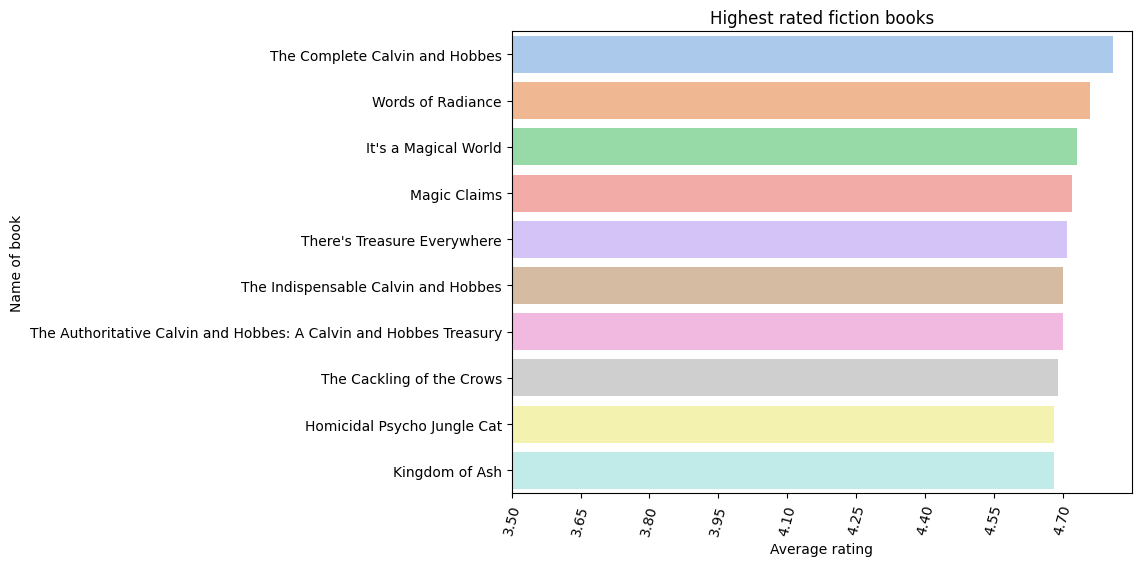

In [ ]:
#highest rated fic
plt.figure(figsize=(8,6))
sns.barplot(y='title', x='rating_score', hue='title', data=fic_rating_10, palette='pastel')
plt.title('Highest rated fiction books')
plt.ylabel('Name of book')
plt.xlabel('Average rating')
plt.xticks(rotation=75)
plt.xlim([3.5,4.85])
plt.xticks(np.arange(3.5, 4.85, step=0.15))  # Set label locations (start at, end at, step by)
plt.show()

3985    ['Nonfiction', 'Memoir', 'Audiobook', 'Feminism', 'Biography', 'True Crime', 'Biography Memoir']
Name: genres, dtype: object


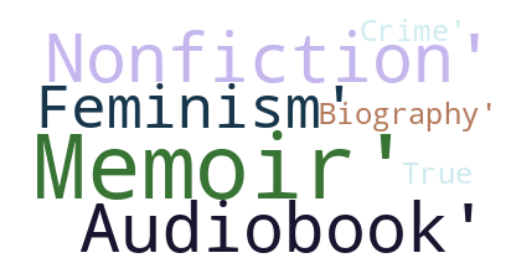

In [ ]:
#word cloud for highest rated books?
from wordcloud import WordCloud

#get the highest rated and turn into str
nf_top_rated = str(nf_rating_10['genres'].head(1))
print(nf_top_rated)

# Generate the word cloud
wordcloud = WordCloud(background_color='white',
                      colormap='cubehelix',
                      max_words=7
                      ).generate(nf_top_rated)

# Display the word cloud using matplotlib
# plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') #imshow displays the image
plt.axis('off')  # Hide x & y axes/lines
plt.show()

- 'interpolation='bilinear': This parameter specifies the interpolation method used to display the image. Interpolation is a technique used to estimate pixel values when scaling or transforming an image.
- The 'bilinear' interpolation method smooths the image by taking a weighted average of the four nearest pixels. This helps to make the image look smoother, especially when the image is resized.

In [ ]:
nf_ratings_msk[['title', 'genres']].head(1)

,title,genres
3985,Know My Name,"['Nonfiction', 'Memoir', 'Audiobook', 'Feminism', 'Biography', 'True Crime', 'Biography Memoir']"


2542    ['Comics', 'Humor', 'Graphic Novels', 'Fiction', 'Classics', 'Comedy', 'Comic Strips']
Name: genres, dtype: object


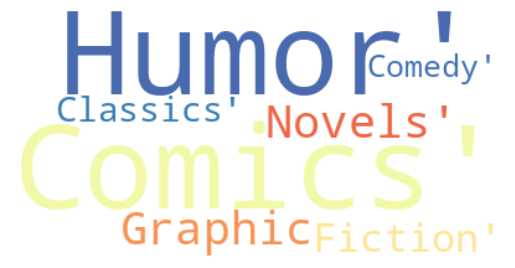

In [ ]:
#word cloud highest rated fiction

#get the highest rated and turn into str
fic_top_rated = str(fic_rating_10['genres'].head(1))
print(fic_top_rated)

# Generate the word cloud
wordcloud = WordCloud(background_color='white',
                      colormap='Spectral',
                      max_words=7 # Limit number of words
                      ).generate(fic_top_rated)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear') #imshow displays the image
plt.axis('off')  # Hide x & y axes/lines
plt.show()

#### All fiction

In [ ]:
import ast
import itertools

fiction_genres = fic_ratings_msk.genres
fiction_genres = fiction_genres.apply(ast.literal_eval) #If the 'genres' column contains strings, convert them to lists using ast
# fiction_genres

# Flatten the list of genres
fiction_genres = list(itertools.chain.from_iterable(fiction_genres)) #combine all the genre lists
print(type(fiction_genres))

remove_words = ['Adult', 'Young Adult', 'Childrens', 'Kids', 'New Adult', 'Audiobook', 'Fiction', 'Nonfiction', 'Book']
filtered_fic = [word for word in fiction_genres if word not in remove_words]
filtered_fic #a list

my_fic_gen = " ".join(filtered_fic)
my_fic_gen
type(filtered_fic)

<class 'list'>


list

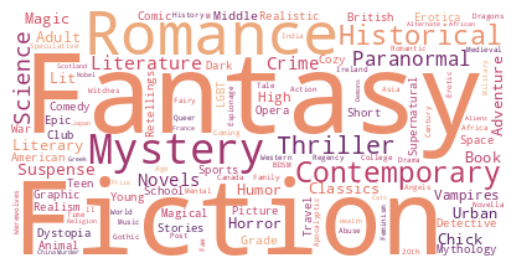

In [ ]:
# Generate the word cloud
wordcloud = WordCloud(background_color='white',
                      colormap='flare',
                      collocations=False  # Avoid duplicate words
                      ).generate(my_fic_gen)
#
# Display the word cloud using matplotlib
# plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') #imshow displays the image
plt.axis('off')  # Hide x & y axes/lines
plt.show()

#### All non_fiction

In [ ]:
nonfic_genres = nf_ratings_msk.genres
nonfic_genres = nonfic_genres.apply(ast.literal_eval) #If the 'genres' column contains strings, convert them to lists using ast
# nonfic_genres

# Flatten the list of genres
nonfic_genres = list(itertools.chain.from_iterable(nonfic_genres)) #combine all the genre lists
nonfic_genres

remove_words = ['Adult', 'Young Adult', 'Childrens', 'Kids', 'New Adult', 'Audiobook', 'Fiction', 'Nonfiction']
filtered_nonfic = [word for word in nonfic_genres if word not in remove_words]
filtered_nonfic

my_nonfic_gen = " ".join(filtered_nonfic)
my_nonfic_gen

'Memoir Feminism Biography True Crime Biography Memoir Essays Race History African American Philosophy Politics Memoir Biography True Crime Race Social Justice Music Humor Poetry Reference Feminism Race History Politics Theory Social Justice Graphic Novels Comics History Biography Memoir Historical Politics History Contemporary Social Justice History Biography True Crime Business Science History Civil War American History American Civil War War Military History History Race Social Justice Sociology Anti Racist History War Feminism Russia World War II Historical Feminism Essays Womens Parenting Africa art galiza hespaña Feminism Race History Social Justice Politics Womens Memoir Biography Humor Autobiography Africa Memoir Biography Biography Memoir Autobiography Book Club Sociology Politics Social Justice History Economics Memoir Biography Mental Health Autobiography Memoir Biography Autobiography Politics Biography Memoir History Plays Music Historical Theatre History Holocaust Memoir 

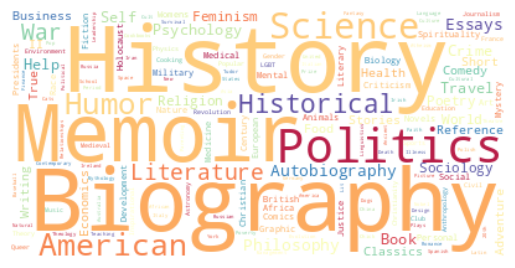

In [ ]:
# all non-fiction

# Generate the word cloud
wordcloud = WordCloud(background_color='white',
                      colormap='Spectral',
                      collocations=False  # Avoid duplicate words
                      ).generate(my_nonfic_gen)
#
# Display the word cloud using matplotlib
# plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear') #imshow displays the image
plt.axis('off')  # Hide x & y axes/lines
plt.show()

### Possibly to look at:

- Current Readers: The current number of readers of the book.
- Want to Read: The number of people interested in reading the book.